In [ ]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as mtp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [22]:
dataset = pd.read_csv("User_Data.csv")

x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0
)

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

In [25]:
y_pred = classifier.predict(x_test)
print("Predicted:\n", y_pred)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Predicted:
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]
Confusion Matrix:
 [[65  3]
 [ 7 25]]


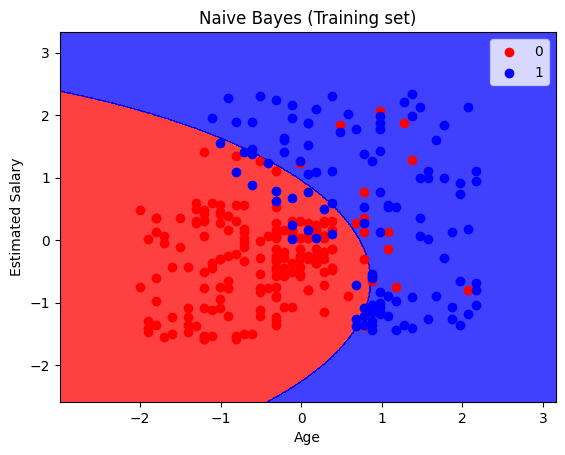

In [26]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
X1, X2 = nm.meshgrid(
    nm.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    nm.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01),
)

mtp.contourf(
    X1,
    X2,
    classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(["red", "blue"]),  # ✅ Fixed here
)

mtp.xlim(X1.min(), X1.max())
mtp.ylim(X2.min(), X2.max())

for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1], c=["red", "blue"][i], label=j
    )

mtp.title("Naive Bayes (Training set)")
mtp.xlabel("Age")
mtp.ylabel("Estimated Salary")
mtp.legend()
mtp.show()